In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# make consistent column names across files
country_title = ['Country', 'Country or region', "Country name"]
economy_title = ["Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita", "Explained by: Log GDP per capita"]
trust_title = ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"]
health_title = ["Health (Life Expectancy)", "Health..Life.Expectancy.", "Explained by: Log GDP per capita", "Healthy life expectancy"]
generosity_title = ["Generosity"]
family_title = ["Family", "Social support"]
score_title = ["Happiness Score", "Happiness.Score", "Score", "Ladder score"]

# process each year
data_all_years_list = []
for year in range(2015, 2022):
    file = pd.read_csv(f'data/{year}.csv')
    if year == 2021 or year == 2020:
        if file.columns[8] == health_title[3]:
            file = file.drop(file.columns[8], axis=1)
    df = file.loc[:, file.columns.isin(list(country_title))].copy()
    df = df.rename(columns={'Country or region': 'Country', "Country name": 'Country'})
    df["Economy"] = file.loc[:, file.columns.isin(list(economy_title))].copy()
    df["Trust"] = file.loc[:, file.columns.isin(list(trust_title))].copy()
    df["Health"] = file.loc[:, file.columns.isin(list(health_title))].copy()
    df["Generosity"] = file.loc[:, file.columns.isin(list(generosity_title))].copy()
    df["Family"] = file.loc[:, file.columns.isin(list(family_title))].copy()
    df["Score"] = file.loc[:, file.columns.isin(list(score_title))].copy()
    df["Year"] = year
    data_all_years_list.append(df)
    # display(file)

# concatenate each year and create single dataframe
df = pd.concat(data_all_years_list, ignore_index=True)
# df = df.replace(to_replace=np.nan, value = -99)

features = df[["Country", "Economy", "Trust", "Health", "Generosity", "Family"]]
target = df["Score"]
display(df)

,Country,Economy,Trust,Health,Generosity,Family,Score,Year
0,Switzerland,1.39651,0.41978,0.94143,0.29678,1.34951,7.587,2015
1,Iceland,1.30232,0.14145,0.94784,0.43630,1.40223,7.561,2015
2,Denmark,1.32548,0.48357,0.87464,0.34139,1.36058,7.527,2015
3,Norway,1.45900,0.36503,0.88521,0.34699,1.33095,7.522,2015
4,Canada,1.32629,0.32957,0.90563,0.45811,1.32261,7.427,2015
...,...,...,...,...,...,...,...,...
1079,Lesotho,0.45100,0.91500,0.45100,-0.13100,0.78700,3.512,2021
1080,Botswana,1.09900,0.80100,1.09900,-0.24600,0.78400,3.467,2021
1081,Rwanda,0.36400,0.16700,0.36400,0.06100,0.55200,3.415,2021
1082,Zimbabwe,0.45700,0.82100,0.45700,-0.04700,0.75000,3.145,2021


In [56]:
# Economy

mean = df["Economy"].mean()
median = df["Economy"].median()
min = df["Economy"].min()
series_min = df.iloc[int(df["Economy"].argmin())]
country_min = series_min["Country"]
year_min = series_min["Year"]
max = df["Economy"].max()
series_max = df.iloc[int(df["Economy"].argmax())]
country_max = series_max["Country"]
year_max = series_max["Year"]

print("Economy Mean: ", round(mean, 5))
print("Economy Median: ", round(median, 5))
print("Economy Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
print("Economy Maximum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")")

Economy Mean:  0.91778
Economy Median:  0.98221
Economy Minimum: 0.0 (Congo (Kinshasa), 2015)
Economy Maximum: 2.096 (United Arab Emirates, 2018)


In [57]:
# Trust

mean = df["Trust"].mean()
median = df["Trust"].median()
min = df["Trust"].min()
series_min = df.iloc[int(df["Trust"].argmin())]
country_min = series_min["Country"]
year_min = series_min["Year"]
max = df["Trust"].max()
series_max = df.iloc[int(df["Trust"].argmax())]
country_max = series_max["Country"]
year_max = series_max["Year"]

print("Trust Mean: ", round(mean, 5))
print("Trust Median: ", round(median, 5))
print("Trust Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
print("Trust Maximum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")")

Trust Mean:  0.29411
Trust Median:  0.13696
Trust Minimum: 0.0 (Indonesia, 2015)
Trust Maximum: 0.939 (Croatia, 2021)


In [58]:
# Health

mean = df["Health"].mean()
median = df["Health"].median()
min = df["Health"].min()
series_min = df.iloc[int(df["Health"].argmin())]
country_min = series_min["Country"]
year_min = series_min["Year"]
max = df["Health"].max()
series_max = df.iloc[int(df["Health"].argmax())]
country_max = series_max["Country"]
year_max = series_max["Year"]

print("Health Mean: ", round(mean, 5))
print("Health Median: ", round(median, 5))
print("Health Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
print("Health Maximum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")")

Health Mean:  0.69873
Health Median:  0.69802
Health Minimum: 0.0 (Sierra Leone, 2015)
Health Maximum: 1.751 (Luxembourg, 2021)


In [59]:
# Generosity

mean = df["Generosity"].mean()
median = df["Generosity"].median()
min = df["Generosity"].min()
series_min = df.iloc[int(df["Generosity"].argmin())]
country_min = series_min["Country"]
year_min = series_min["Year"]
max = df["Generosity"].max()
series_max = df.iloc[int(df["Generosity"].argmax())]
country_max = series_max["Country"]
year_max = series_max["Year"]

print("Generosity Mean: ", round(mean, 5))
print("Generosity Median: ", round(median, 5))
print("Generosity Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
print("Generosity Minimum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")")

Generosity Mean:  0.15354
Generosity Median:  0.16214
Generosity Minimum: -0.30091 (Greece, 2020)
Generosity Minimum: 0.83808 (Myanmar, 2017)


In [60]:
# Family

mean = df["Family"].mean()
median = df["Family"].median()
min = df["Family"].min()
series_min = df.iloc[int(df["Family"].argmin())]
country_min = series_min["Country"]
year_min = series_min["Year"]
max = df["Family"].max()
series_max = df.iloc[int(df["Family"].argmax())]
country_max = series_max["Country"]
year_max = series_max["Year"]

print("Family Mean: ", round(mean, 5))
print("Family Median: ", round(median, 5))
print("Family Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
print("Family Maximum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")")

Family Mean:  1.00409
Family Median:  0.948
Family Minimum: 0.0 (Central African Republic, 2015)
Family Maximum: 1.644 (Iceland, 2018)


In [61]:
# Score

mean = df["Score"].mean()
median = df["Score"].median()
min = df["Score"].min()
series_min = df.iloc[int(df["Score"].argmin())]
country_min = series_min["Country"]
year_min = series_min["Year"]
max = df["Score"].max()
series_max = df.iloc[int(df["Score"].argmax())]
country_max = series_max["Country"]
year_max = series_max["Year"]

print("Score Mean: ", round(mean, 5))
print("Score Median: ", round(median, 5))
print("Score Minimum: " + str(round(min, 5)) + " (" + country_min + ", " + str(year_min) + ")")
print("Score Maximum: " + str(round(max, 5)) + " (" + country_max + ", " + str(year_max) + ")")

Score Mean:  5.41346
Score Median:  5.38515
Score Minimum: 2.523 (Afghanistan, 2021)
Score Maximum: 7.842 (Finland, 2021)


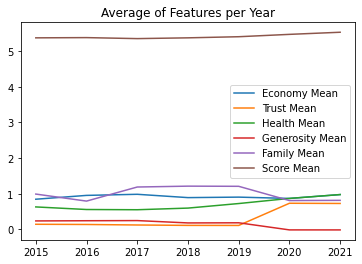

In [69]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
economy_avgs = []
trust_avgs = []
health_avgs = []
generosity_avgs = []
social_supp_avgs = []
score_avgs = []

for year in years:
    df_year = df[df["Year"] == year]
    economy_avgs.append(df_year["Economy"].mean())
    trust_avgs.append(df_year["Trust"].mean())
    health_avgs.append(df_year["Health"].mean())
    generosity_avgs.append(df_year["Generosity"].mean())
    social_supp_avgs.append(df_year["Family"].mean())
    score_avgs.append(df_year["Score"].mean())

plt.plot(years, economy_avgs, label = "Economy Mean")
plt.plot(years, trust_avgs, label = "Trust Mean")
plt.plot(years, health_avgs, label = "Health Mean")
plt.plot(years, generosity_avgs, label = "Generosity Mean")
plt.plot(years, social_supp_avgs, label = "Family Mean")
plt.plot(years, score_avgs, label = "Score Mean")
plt.legend()
plt.title("Average of Features per Year")
plt.show()